In [4]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# the dataset has 4 features-userid,productid,rating,timestamp
#userid- every user is identified with a unique id
#productid- every product has a corresponding user
# rating of the corresponding product by the corresponding user
#timestamp-time of the rating

In [8]:
e_data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Spring 23/Data Science Projects/archive/ratings_Electronics (1).csv",names=['userId', 'productId','Rating','timestamp'])

In [10]:
e_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [11]:
e_data.shape

(7824482, 4)

In [13]:
e_data=e_data.iloc[:104000]

In [14]:
e_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [15]:
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10400 entries, 0 to 10399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10400 non-null  object 
 1   productId  10400 non-null  object 
 2   Rating     10400 non-null  float64
 3   timestamp  10400 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 325.1+ KB


In [23]:
e_data.describe()['Rating']

count    10400.000000
mean         3.915000
std          1.468222
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [26]:
print("max rating is",e_data['Rating'].max())

max rating is 5.0


In [29]:
print("no of missing values across columns is \n",e_data.isnull().sum())

no of missing values across columns is 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


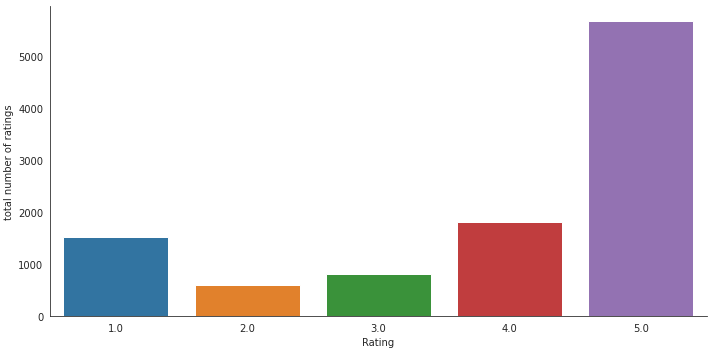

In [33]:
with sns.axes_style('white'):
    g=sns.factorplot("Rating",data=e_data,aspect=2.0,kind='count')
    g.set_ylabels("total number of ratings")

<AxesSubplot:xlabel='Rating', ylabel='count'>

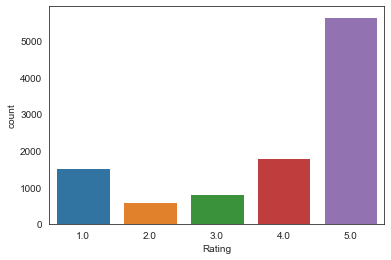

In [35]:
# practice for sns plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.countplot(x='Rating',data=e_data)


In [40]:
print("total_data")
print("total no of ratings:", e_data.shape[0])
print("total no of Users", len(np.unique(e_data['userId'])))
print("total no of products",len(np.unique(e_data['productId'])))

total_data
total no of ratings: 10400
total no of Users 10215
total no of products 1331


In [44]:
e_data.drop(['timestamp'],axis=1,inplace=True)


KeyError: "['timestamp'] not found in axis"

In [45]:
e_data

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0
...,...,...,...
10395,A2BV56E1C7VLD7,B00000J1QS,1.0
10396,A2WPN95SG8ME8W,B00000J1QT,5.0
10397,A3OV2UW8ULIQP9,B00000J1QT,5.0
10398,A2L7Y1X37I1M6L,B00000J1QT,3.0


In [46]:
#analyzing the rating
no_rated_products_per_user=e_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

In [64]:
no_rated_products_per_user

userId
A3LDPF5FMB782Z    5
AT8TIN5JKHO2V     5
A2HDTOF8222KN3    4
A1TBH7Z4RK7PRK    4
A39DZU4YRGKWAG    3
                 ..
A2AIS6YFU6ABPI    1
A2AJ77KV1AA7T0    1
A2AJB67RIHEXIM    1
A2AJODIBRPFL9G    1
AZZMV5VT9W7Y8     1
Name: Rating, Length: 10215, dtype: int64

In [65]:
no_rated_products_per_user.head()

userId
A3LDPF5FMB782Z    5
AT8TIN5JKHO2V     5
A2HDTOF8222KN3    4
A1TBH7Z4RK7PRK    4
A39DZU4YRGKWAG    3
Name: Rating, dtype: int64

In [66]:
no_rated_products_per_user.describe()

count    10215.000000
mean         1.018111
std          0.151892
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Rating, dtype: float64

In [68]:
e_data['userId'].nunique()

10215

In [71]:
quantiles=no_rated_products_per_user.quantile(np.arange(0,1.01,.01),interpolation='higher')

In [72]:
quantiles 

0.00    1
0.01    1
0.02    1
0.03    1
0.04    1
       ..
0.96    1
0.97    1
0.98    1
0.99    2
1.00    5
Name: Rating, Length: 101, dtype: int64

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their values')

<AxesSubplot:title={'center':'Quantiles and their values'}>

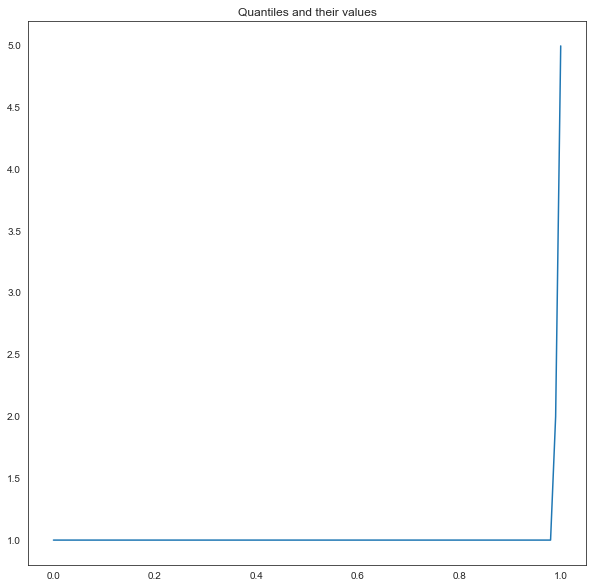

In [73]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their values")
quantiles.plot()

In [81]:
print("no of rated product more than 5 per user: {} \n".format(sum(no_rated_products_per_user>=5)))

no of rated product more than 5 per user: 2 



In [ ]:
#popularity based recommendation
''' It uses the items that are trending now, if any product which is bought by every new user then there are chances that it may suggest that item to the user who just signed up.Personalization is not available with this method'''

In [90]:
new_df=e_data.groupby("productId").filter(lambda x:x['Rating'].count()>=50)
new_df
# the dataframe contains users who have given 50 or more ratings

,userId,productId,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
...,...,...,...
10382,A2UKE398XW8Z6J,B00000J1QR,2.0
10383,A2YG15FR3JP4JC,B00000J1QR,2.0
10384,A0266076X6KPZ6CCHGVS,B00000J1QR,5.0
10385,A29UNXK7F3S93L,B00000J1QR,5.0


Text(0.5, 0, 'Product')

Text(0, 0.5, 'No of ratings per product')

[Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, ''),
 Text(20.0, 0, ''),
 Text(25.0, 0, ''),
 Text(30.0, 0, ''),
 Text(35.0, 0, ''),
 Text(40.0, 0, ''),
 Text(45.0, 0, '')]

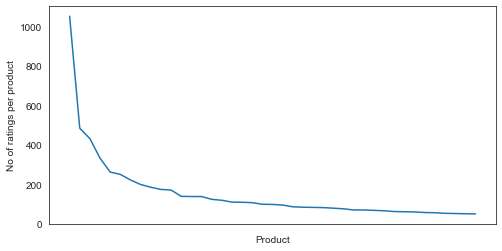

In [95]:
no_of_ratings_per_product=new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)
fig=plt.figure(figsize=plt.figaspect(.5))
ax=plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])
plt.show()

In [93]:
no_of_ratings_per_product.values

array([1051,  484,  431,  332,  262,  250,  222,  199,  185,  174,  171,
        139,  138,  138,  124,  119,  110,  109,  107,   99,   98,   95,
         86,   84,   83,   82,   79,   76,   70,   70,   68,   66,   62,
         61,   60,   57,   56,   53,   52,   51,   50], dtype=int64)

In [101]:
new_df.groupby("productId")['Rating'].count().sort_values(ascending=False).head()

productId
0972683275    1051
1400532655     484
140053271X     431
B00000DM9W     332
B00000J061     262
Name: Rating, dtype: int64

In [102]:
ratings_mean_count=pd.DataFrame(new_df.groupby("productId")['Rating'].mean())

In [108]:
ratings_mean_count['rating_counts']=pd.DataFrame(new_df.groupby("productId")['Rating'].count())

In [109]:
ratings_mean_count

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171
1400532655,3.727273,484
140053271X,3.900232,431
1400532736,3.904762,84
1400599997,3.490991,222


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

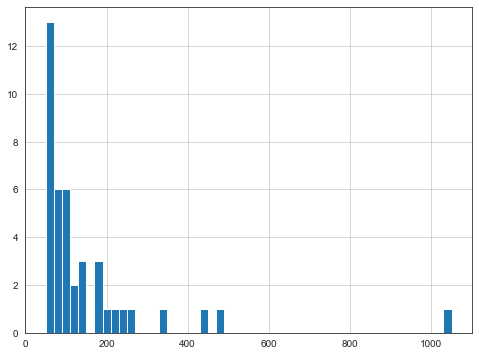

In [110]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

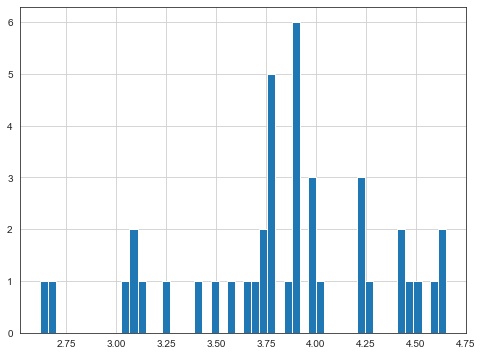

In [111]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

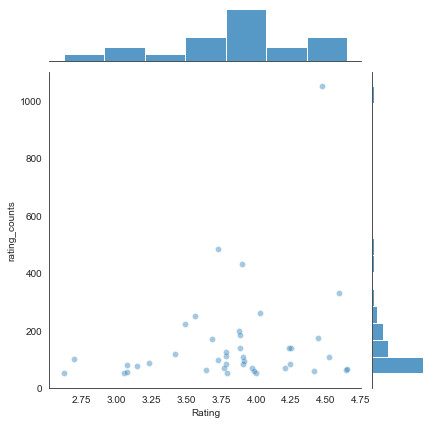

In [112]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [115]:
popular_products=pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular=popular_products.sort_values('Rating',ascending=False)

<AxesSubplot:xlabel='productId'>

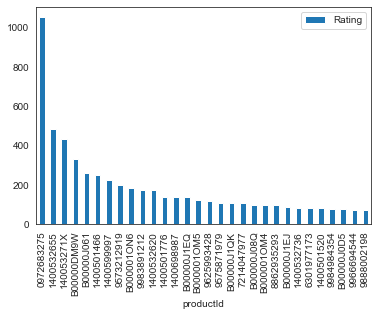

In [116]:
most_popular.head(30).plot(kind = "bar")